In [1]:
# import the required packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline
sns.set(style="darkgrid")

In [2]:
#Feed file path to read_csv
tips = pd.read_csv('./tips.csv')

# view dataset
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
mi = tips.total_bill.min()
ma = tips.total_bill.max()

bins = np.linspace(mi, ma, 5)
tips['bill_bin'] = pd.cut(tips.total_bill, bins).astype('category')

In [4]:
# let's take a look
tips.head()

,total_bill,tip,sex,smoker,day,time,size,bill_bin
0,16.99,1.01,Female,No,Sun,Dinner,2,"(15.005, 26.94]"
1,10.34,1.66,Male,No,Sun,Dinner,3,"(3.07, 15.005]"
2,21.01,3.50,Male,No,Sun,Dinner,3,"(15.005, 26.94]"
3,23.68,3.31,Male,No,Sun,Dinner,2,"(15.005, 26.94]"
4,24.59,3.61,Female,No,Sun,Dinner,4,"(15.005, 26.94]"


Text(0.5, 1.0, 'Most contributing bill ranges')

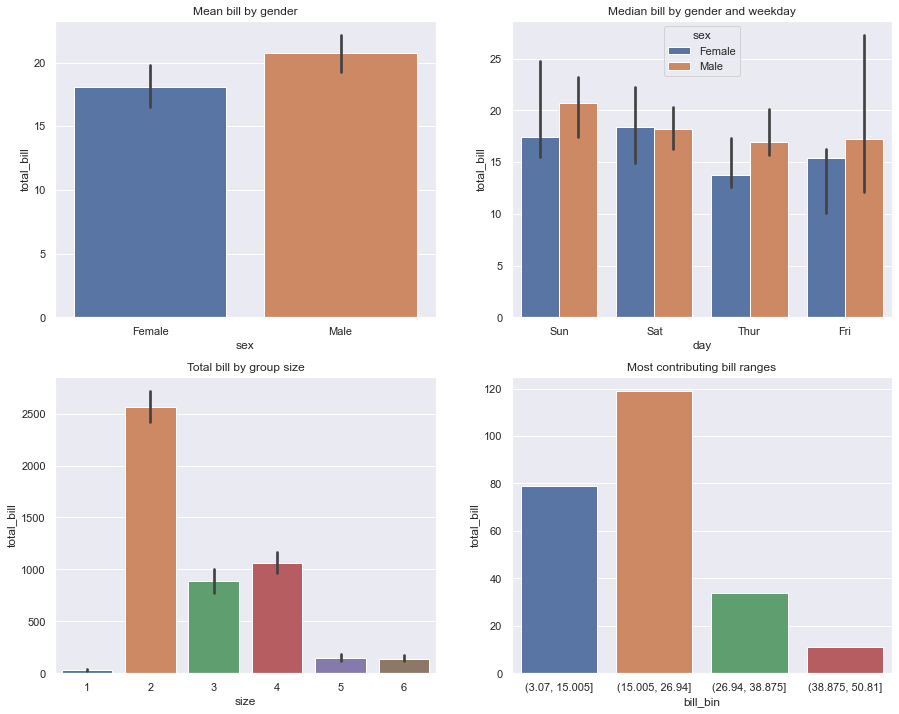

In [5]:
# Instantiate a figure and allocate 4 axes, on a 2-by-2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Create a barplot to
sns.barplot(x='sex', y='total_bill', data=tips, ax=axes[0,0], estimator=np.mean)
axes[0,0].set_title('Mean bill by gender')

sns.barplot(x='day', y='total_bill', data=tips, ax=axes[0, 1], hue='sex', estimator=np.median)
axes[0,1].set_title('Median bill by gender and weekday')

sns.barplot(x='size', y='total_bill', data=tips, ax=axes[1,0], estimator=np.sum)
axes[1,0].set_title('Total bill by group size')

sns.barplot(x='bill_bin', y='total_bill', data=tips, estimator=np.size, ax=axes[1,1])
axes[1,1].set_title('Most contributing bill ranges')